# Algotytm przecinania się odcinków na płaszczyźnie

In [1]:
import numpy as np
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

import random

# Przydatne funkcje 

In [2]:
def draw_example_1():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


In [3]:
# Wizualizacja zbioru odcinków

In [4]:
def sectionVis(section):
    vis = Visualizer()
    vis.add_line_segment(section)
    return vis

    

### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

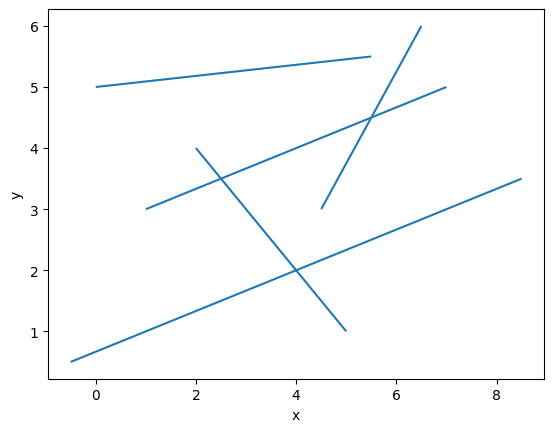

In [5]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

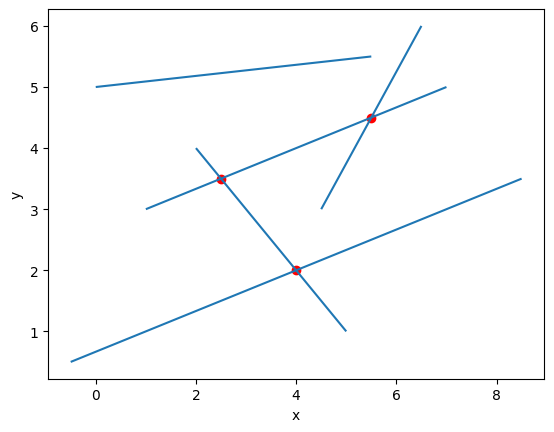

In [6]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [60]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    result = []
    for i in range(n):
        x1 = round(random.uniform(0,max_x), 4)
        y1 = round(random.uniform(0,max_y), 4)
        x2 = round(random.uniform(0,max_y), 4)
        y2 = round(random.uniform(0,max_y), 4)
        while x2 == x1:
            x2 = random.uniform(0,max_x)
        if x1 < x2:
            result.append( ((x1,y1),(x2,y2)) )
        else:
            result.append( ((x2,y2),(x1,y1)) )
    
    return result

        

In [8]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.094s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [9]:
section = generate_uniform_sections(1000, 1000, 20)

Zwizualizuj otrzymane odcinki

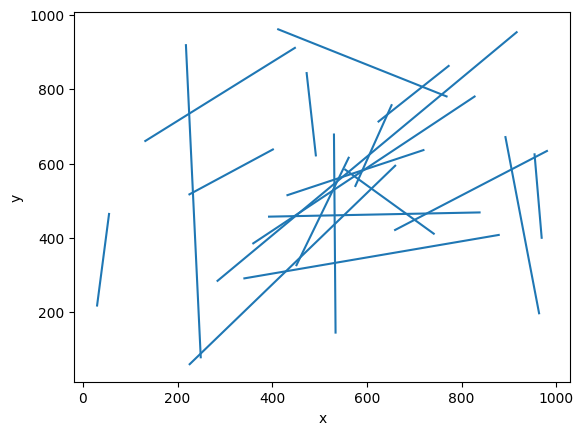

In [10]:
visualize = sectionVis(section)
visualize.show()

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką

In [75]:
# def add_sections(sections):

Uzupełnij funkcję ```is_intersection```

In [76]:
def is_intersection(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    raise Exception("Unimplemented")

In [77]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: 

Exception: Unimplemented

### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

In [31]:
# Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [32]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    raise Exception("Unimplemented")

Uzupełnij funkcję ```find_intersections```

In [33]:
# Pomocnicze

In [80]:
from sortedcontainers import SortedList


def orient(a, b, c):
    return (c[1] - a[1]) * (b[0] - a[0]) > (b[1] - a[1]) * (c[0] - a[0])


def if_intersect(p1, p2, q1, q2):
    return (orient(p1, q1, q2) != orient(p2, q1, q2)) and (orient(p1, p2, q1) != orient(p1, p2, q2))


def section_intersection(s1, s2):
    p1, p2 = s1
    q1, q2 = s2

    A1 = p2[1] - p1[1]
    B1 = p1[0] - p2[0]
    C1 = A1 * p1[0] + B1 * p1[1]
    A2 = q2[1] - q1[1]
    B2 = q1[0] - q2[0]
    C2 = A2 * q1[0] + B2 * q1[1]
    det = A1 * B2 - A2 * B1

    if det == 0:
        return None

    x = (B2 * C1 - B1 * C2) / det
    y = (A1 * C2 - A2 * C1) / det

    return (x, y)



def bin_insert(sorted_list, element):
    left, right = 0, len(sorted_list)
    while left < right:
        mid = (left + right) // 2
        if sorted_list[mid][0] < element[0]:
            left = mid + 1
        else:
            right = mid

    sorted_list.insert(left, element)



In [78]:
def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    events = []
    for i, (p1, p2) in enumerate(sections):
        if p1[0] > p2[0]:
            p1, p2 = p2, p1
        events.append((p1[0], 0, i, p1, p2))
        events.append((p2[0], 1, i, p1, p2))

    events.sort()
    active_sections = SortedList(key=lambda i: (sections[i][0][1], sections[i][1][1]))
    intersections = []

    for event in events:
        x, event_type, index, p1, p2 = event
        if event_type == 0:
            active_sections.add(index)
            idx = active_sections.index(index)

            if idx != 0 and if_intersect(sections[active_sections[idx - 1]][0], sections[active_sections[idx - 1]][1],
                                         p1, p2):
                inter = section_intersection(sections[active_sections[idx - 1]], (p1, p2))
                if inter:
                    intersections.append((inter, active_sections[idx-1], active_sections[idx]))
                    bin_insert(events, (inter[0], 2, active_sections[idx-1], active_sections[idx]))
            if idx != len(active_sections) - 1 and if_intersect(sections[active_sections[idx + 1]][0],
                                                                sections[active_sections[idx + 1]][1], p1, p2):
                inter = section_intersection(sections[active_sections[idx + 1]], (p1, p2))
                if inter:
                    intersections.append((inter, active_sections[idx], active_sections[idx+1]))
                    bin_insert(events, (inter[0], 2, active_sections[idx], active_sections[idx+1]))
        elif event_type == 1:
            idx = active_sections.index(index)
            if 0 < idx < len(active_sections) - 1:
                if if_intersect(sections[active_sections[idx - 1]][0], sections[active_sections[idx - 1]][1],
                                sections[active_sections[idx + 1]][0], sections[active_sections[idx + 1]][1]):
                    inter = section_intersection(sections[active_sections[idx - 1]], sections[active_sections[idx + 1]])
                    if inter:
                        intersections.append((inter, active_sections[idx-1], active_sections[idx+1]))
                        bin_insert(events, (inter[0], 2, active_sections[idx-1], active_sections[idx+1]))
            active_sections.remove(index)
        else:
            i1 = active_sections.index(p1)
            i2 = active_sections.index(p2)
            
            active_sections[i1], active_sections[i2] = active_sections[i2], active_sections[i1]
            if i1 < len(active_sections)-1 and if_intersect(sections[active_sections[i1]][0], sections[active_sections[i1]][1],
                                sections[active_sections[i1 + 1]][0], sections[active_sections[i1 + 1]][1]):
                inter = section_intersection(sections[active_sections[i1]], sections[active_sections[i1 + 1]])
                if inter:
                    intersections.append((inter, active_sections[i1], active_sections[i1+1]))
                    bin_insert(events, (inter[0], 2, active_sections[i1], active_sections[i1+1]))
            if i2 > 0 and if_intersect(sections[active_sections[i2-1]][0], sections[active_sections[i2-1]][1],
                                sections[active_sections[i2]][0], sections[active_sections[i2]][1]):
                inter = section_intersection(sections[active_sections[i2-1]], sections[active_sections[i2]])
                if inter:
                    intersections.append((inter, active_sections[i2-1], active_sections[i2]))
                    bin_insert(events, (inter[0], 2, active_sections[i2-1], active_sections[i2]))

    return intersections
   

In [ ]:
Test().runtest(3, find_intersections)

Uzupełnij funkcję ```find_intersections_with_visualization```

In [ ]:
def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    vis = sectionVis(sections)
    
    events = []
    for i, (p1, p2) in enumerate(sections):
        if p1[0] > p2[0]:
            p1, p2 = p2, p1
        events.append((p1[0], 0, i, p1, p2))
        events.append((p2[0], 1, i, p1, p2))

    events.sort()
    active_sections = SortedList(key=lambda i: (sections[i][0][1], sections[i][1][1]))
    intersections = []

    for event in events:
        x, event_type, index, p1, p2 = event
        sweep = vis.add_line_segment(((x,0),(x, 20)), color='red')
        if event_type == 0:
            active_sections.add(index)
            vis.add_line_segment((p1,p2), color='yellow')
            idx = active_sections.index(index)

            if idx != 0 and if_intersect(sections[active_sections[idx - 1]][0], sections[active_sections[idx - 1]][1],
                                         p1, p2):
                inter = section_intersection(sections[active_sections[idx - 1]], (p1, p2))
                if inter:
                    intersections.append((inter, active_sections[idx-1], active_sections[idx]))
                    vis.add_point(inter, color='brown')
            if idx != len(active_sections) - 1 and if_intersect(sections[active_sections[idx + 1]][0],
                                                                sections[active_sections[idx + 1]][1], p1, p2):
                inter = section_intersection(sections[active_sections[idx + 1]], (p1, p2))
                if inter:
                    intersections.append((inter, active_sections[idx], active_sections[idx+1]))
                    bin_insert(events, (inter[0], 2, active_sections[idx-1], active_sections[idx]))
                    vis.add_point(inter, color='brown')
        elif event_type == 1:
            idx = active_sections.index(index)
            if 0 < idx < len(active_sections) - 1:
                if if_intersect(sections[active_sections[idx - 1]][0], sections[active_sections[idx - 1]][1],
                                sections[active_sections[idx + 1]][0], sections[active_sections[idx + 1]][1]):
                    inter = section_intersection(sections[active_sections[idx - 1]], sections[active_sections[idx + 1]])
                    if inter:
                        intersections.append((inter, active_sections[idx-1], active_sections[idx+1]))
                        vis.add_point(inter, color='brown')
            active_sections.remove(index)
            vis.add_line_segment((p1,p2), color='black')
        else
            

        vis.remove_figure(sweep)


    return intersections, vis


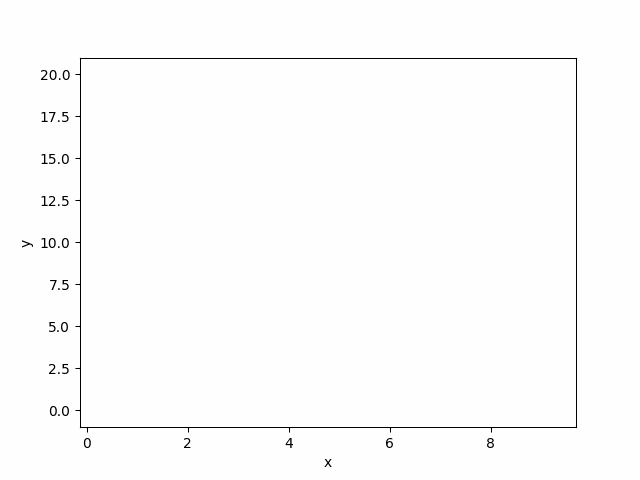

In [60]:
sect = generate_uniform_sections(10, 10, 5)
_, vis = find_intersections_with_visualization(sect)
vis.show_gif()


### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

In [ ]:
# Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

In [ ]:
# Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [ ]:
# testing_sections = ???

In [ ]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

In [ ]:
# Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.

In [4]:
from sortedcontainers import SortedList

# Pomocnicze funkcje matematyczne
def ccw(a, b, c):
    """Sprawdza, czy punkty a, b, c są w porządku przeciwnym do ruchu wskazówek zegara"""
    return (c[1] - a[1]) * (b[0] - a[0]) > (b[1] - a[1]) * (c[0] - a[0])

def segments_intersect(p1, p2, q1, q2):
    """Sprawdza, czy odcinki p1p2 i q1q2 się przecinają"""
    return (ccw(p1, q1, q2) != ccw(p2, q1, q2)) and (ccw(p1, p2, q1) != ccw(p1, p2, q2))

def segment_intersection(s1, s2):
    """Sprawdza i zwraca punkt przecięcia dwóch odcinków, jeśli istnieje"""
    p1, p2 = s1
    q1, q2 = s2

    # Parametryczne równania prostych
    A1 = p2[1] - p1[1]
    B1 = p1[0] - p2[0]
    C1 = A1 * p1[0] + B1 * p1[1]
    A2 = q2[1] - q1[1]
    B2 = q1[0] - q2[0]
    C2 = A2 * q1[0] + B2 * q1[1]
    det = A1 * B2 - A2 * B1

    if det == 0:
        return None  # Odcinki równoległe lub współliniowe

    # Punkt przecięcia
    x = (B2 * C1 - B1 * C2) / det
    y = (A1 * C2 - A2 * C1) / det

    # Sprawdzenie, czy punkt leży na obu odcinkach
    if (min(p1[0], p2[0]) <= x <= max(p1[0], p2[0]) and
        min(p1[1], p2[1]) <= y <= max(p1[1], p2[1]) and
        min(q1[0], q2[0]) <= x <= max(q1[0], q2[0]) and
        min(q1[1], q2[1]) <= y <= max(q1[1], q2[1])):
        return (x, y)

    return None

# Algorytm zamiatania
def find_intersections(segments):
    """Znajduje wszystkie przecięcia wśród odcinków"""
    events = []  # Zdarzenia: początek i koniec odcinków
    for i, (p1, p2) in enumerate(segments):
        if p1[0] > p2[0]:
            p1, p2 = p2, p1
        events.append((p1[0], 0, i, p1, p2))  # Punkt początkowy
        events.append((p2[0], 1, i, p1, p2))  # Punkt końcowy

    # Sortowanie zdarzeń
    events.sort()
    active_segments = SortedList(key=lambda i: (segments[i][0][1], segments[i][1][1]))
    intersections = []

    for event in events:
        x, event_type, index, p1, p2 = event
        if event_type == 0:  # Dodaj odcinek do aktywnych
            active_segments.add(index)
            idx = active_segments.index(index)

            # Sprawdź sąsiadów
            if idx > 0 and segments_intersect(segments[active_segments[idx - 1]][0], segments[active_segments[idx - 1]][1], p1, p2):
                inter = segment_intersection(segments[active_segments[idx - 1]], (p1, p2))
                if inter:
                    intersections.append(inter)
            if idx < len(active_segments) - 1 and segments_intersect(segments[active_segments[idx + 1]][0], segments[active_segments[idx + 1]][1], p1, p2):
                inter = segment_intersection(segments[active_segments[idx + 1]], (p1, p2))
                if inter:
                    intersections.append(inter)
        else:  # Usuń odcinek z aktywnych
            idx = active_segments.index(index)
            if 0 < idx < len(active_segments) - 1:
                if segments_intersect(segments[active_segments[idx - 1]][0], segments[active_segments[idx - 1]][1], segments[active_segments[idx + 1]][0], segments[active_segments[idx + 1]][1]):
                    inter = segment_intersection(segments[active_segments[idx - 1]], segments[active_segments[idx + 1]])
                    if inter:
                        intersections.append(inter)
            active_segments.remove(index)

    return intersections


# Przykład użycia
segments = [
    ((0, 4), (4, 0)),
    ((1, 4), (4, 1)),
    ((2, 2), (6, 2)),
    ((3, 0), (3, 5))
]

print(find_intersections(segments))


[(2.5, 2.5), (3.0, 2.0), (3.0, 3.0)]


In [82]:
from sortedcontainers import SortedList

def orient(a, b, c):
    # Compute orientation: > 0 if counterclockwise, < 0 if clockwise, 0 if collinear
    return (c[1] - a[1]) * (b[0] - a[0]) - (b[1] - a[1]) * (c[0] - a[0])

def if_intersect(p1, p2, q1, q2):
    # Check if segments (p1, p2) and (q1, q2) intersect
    return (orient(p1, q1, q2) * orient(p2, q1, q2) < 0 and
            orient(q1, p1, p2) * orient(q2, p1, p2) < 0)

def section_intersection(s1, s2):
    # Calculate intersection point of segments s1 and s2
    p1, p2 = s1
    q1, q2 = s2

    A1 = p2[1] - p1[1]
    B1 = p1[0] - p2[0]
    C1 = A1 * p1[0] + B1 * p1[1]

    A2 = q2[1] - q1[1]
    B2 = q1[0] - q2[0]
    C2 = A2 * q1[0] + B2 * q1[1]

    det = A1 * B2 - A2 * B1
    if det == 0:
        return None  # Parallel or collinear

    x = (B2 * C1 - B1 * C2) / det
    y = (A1 * C2 - A2 * C1) / det

    if (min(p1[0], p2[0]) <= x <= max(p1[0], p2[0]) and
        min(q1[0], q2[0]) <= x <= max(q1[0], q2[0]) and
        min(p1[1], p2[1]) <= y <= max(p1[1], p2[1]) and
        min(q1[1], q2[1]) <= y <= max(q1[1], q2[1])):
        return (x, y)
    return None

def find_intersections(sections):
    events = []
    for i, (p1, p2) in enumerate(sections):
        if p1[0] > p2[0]:
            p1, p2 = p2, p1
        events.append((p1[0], 0, i))  # Start event
        events.append((p2[0], 1, i))  # End event

    events.sort()
    active_sections = SortedList(key=lambda i: (sections[i][0][1], sections[i][1][1]))
    intersections = []

    def add_intersection(i1, i2):
        """Check for intersection between segments `i1` and `i2`, and add it as an event."""
        if i1 is None or i2 is None or i1 == i2:
            return
        s1, s2 = sections[i1], sections[i2]
        if if_intersect(s1[0], s1[1], s2[0], s2[1]):
            inter = section_intersection(s1, s2)
            if inter:
                intersections.append((inter, i1, i2))
                events.append((inter[0], 2, (i1, i2)))
                events.sort()  # Ensure events remain sorted

    for event in events:
        x, event_type, index = event

        if event_type == 0:  # Start of a segment
            active_sections.add(index)
            idx = active_sections.index(index)

            # Check for intersections with neighbors
            if idx > 0:
                add_intersection(active_sections[idx - 1], index)
            if idx < len(active_sections) - 1:
                add_intersection(index, active_sections[idx + 1])

        elif event_type == 1:  # End of a segment
            idx = active_sections.index(index)

            # Check for intersection between neighbors before removing
            if 0 < idx < len(active_sections) - 1:
                add_intersection(active_sections[idx - 1], active_sections[idx + 1])

            active_sections.remove(index)

        elif event_type == 2:  # Intersection event
            i1, i2 = index
            idx1 = active_sections.index(i1)
            idx2 = active_sections.index(i2)

            # Remove the two segments and reinsert them to update their order
            active_sections.remove(i1)
            active_sections.remove(i2)

            if idx1 > idx2:  # Ensure correct order for re-insertion
                i1, i2 = i2, i1

            active_sections.add(i1)
            active_sections.add(i2)

            # Check for new intersections between neighbors
            idx1 = active_sections.index(i1)
            idx2 = active_sections.index(i2)

            if idx1 > 0:
                add_intersection(active_sections[idx1 - 1], i1)
            if idx2 < len(active_sections) - 1:
                add_intersection(i2, active_sections[idx2 + 1])

    return intersections


In [142]:
from sortedcontainers import SortedSet


class Segment:
    x = None

    def __init__(self, startP, endP, ind):
        self.startP = startP
        self.endP = endP
        self.ind = ind

    def move_sweep(x):
        Segment.x = x

    def __gt__(self, other):
        v = ((self.endP[0] - self.startP[0]), (self.endP[1] - self.startP[1]))
        v2 = ((other.endP[0] - other.startP[0]), (other.endP[1] - other.startP[1]))

        incline = (self.endP[1] - self.startP[1]) / (self.endP[0] - self.startP[0])
        incline2 = (other.endP[1] - other.startP[1]) / (other.endP[0] - other.startP[0])



        return self.startP[1] + incline * Segment.x > other.startP[1] + incline2 * Segment.x or (self.startP[1] + incline * Segment.x > other.startP[1] + incline2 * Segment.x and incline < incline2)


    def __lt__(self, other):
        incline = (self.endP[1] - self.startP[1]) / (self.endP[0] - self.startP[0])
        incline2 = (other.endP[1] - other.startP[1]) / (other.endP[0] - other.startP[0])
        return self.startP[1] + incline * Segment.x < other.startP[1] + incline2 * Segment.x

    # def __lt__(self,other):
    #     v = ((self.endP[0] - self.startP[0]), (self.endP[1] - self.startP[1]))
    #     v2 = ((other.endP[0] - other.startP[0]), (other.endP[1] - other.startP[1]))
    #
    #     t = (Segment.x - self.startP[0]) / v[0] if v[0] != 0 else float('inf')
    #     t2 = (Segment.x - other.startP[0]) / v2[0] if v2[0] != 0 else float('inf')
    #
    #
    #     return self.startP[1] + t * v[1] < other.startP[1] + t2 * v2[1]

    def __eq__(self, other):
        return (self.startP == other.startP) and (self.endP == other.endP) and (self.ind == other.ind)

    def __hash__(self):
        return hash((self.startP, self.endP, self.ind))

    def __str__(self):
        return str(self.ind) + "-\ " + "(" + str(self.startP[0]) + ", " + str(self.startP[1]) + ")" + "->" + "(" + str(
            self.endP[0]) + ", " + str(self.endP[1]) + ")"


def printSet(sortedset):
    print()
    for i in range(len(sortedset)):
        print(sortedset[i], end=" ")
    print()
    print()


def orient(a, b, c):
    return (c[1] - a[1]) * (b[0] - a[0]) > (b[1] - a[1]) * (c[0] - a[0])


def if_intersect(segment1, segment2):
    p1, p2 = segment1.startP, segment1.endP
    q1, q2 = segment2.startP, segment2.endP
    return (orient(p1, q1, q2) != orient(p2, q1, q2)) and (orient(p1, p2, q1) != orient(p1, p2, q2))


def section_intersection(segment1, segment2):
    p1, p2 = segment1.startP, segment1.endP
    q1, q2 = segment2.startP, segment2.endP

    A1 = p2[1] - p1[1]
    B1 = p1[0] - p2[0]
    C1 = A1 * p1[0] + B1 * p1[1]
    A2 = q2[1] - q1[1]
    B2 = q1[0] - q2[0]
    C2 = A2 * q1[0] + B2 * q1[1]
    det = A1 * B2 - A2 * B1

    if det == 0:
        return None

    x = (B2 * C1 - B1 * C2) / det
    y = (A1 * C2 - A2 * C1) / det

    return (x, y)


def alg(sections):
    n = len(sections)

    Q = SortedSet(key=lambda x: x[0][0])
    T = SortedSet(key=lambda x: x)

    for i in range(n):
        (x1, y1), (x2, y2) = sections[i]
        Q.add(((x1, y1), 0, i))
        Q.add(((x2, y2), 1, i))
    # printSet(Q)
    intersections = set()
    while len(Q) > 0:

        # print(Q)
        event = Q.pop(0)
        print(event)
        point, event_type, ind = event
        print(point[0])

        if event_type == 0:
            Segment.move_sweep(point[0])
            s, t = sections[ind]
            T.add(Segment(s, t, ind))
            # printSet(T)
            # print(Segment(s, t, ind))
            # if len(T) > 1:
            #     print(Segment(s, t, ind) == T[1])
            #     print(T.index(T[0]))
            index = T.index(Segment(s, t, ind))
            if index > 0 and if_intersect(T[index - 1], T[index]):
                intersection_point = section_intersection(T[index - 1], T[index])
                if intersection_point and intersection_point[0] > Segment.x:
                    intersections.add(intersection_point)
                    Q.add(((intersection_point[0], intersection_point[1]), 2, (T[index - 1].ind, T[index].ind)))
            if index < len(T) - 1 and if_intersect(T[index], T[index + 1]):
                intersection_point = section_intersection(T[index], T[index + 1])
                if intersection_point and intersection_point[0] > Segment.x:
                    intersections.add(intersection_point)
                    Q.add(((intersection_point[0], intersection_point[1]), 2, (T[index].ind, T[index + 1].ind)))
        elif event_type == 1:

            s, t = sections[ind]
            temp = Segment(s, t, ind)
            # print("x: ")
            # print(Segment.x)
            # print("temp: ")
            # print(temp)
            # print(temp == T[1])
            # if len(T) > 1:
            #     print(T[0] < T[1])
            #     print(intersections)
            # print("Tree:")
            # printSet(T)
            idx = T.index(temp)
            # print(idx)
            if len(T) - 1 > idx > 0 and if_intersect(T[idx - 1], T[idx + 1]):
                intersection_point = section_intersection(T[idx - 1], T[idx + 1])
                if intersection_point and intersection_point[0] > point[0]:
                    intersections.add(intersection_point)
                    Q.add(((intersection_point[0], intersection_point[1]), 2, (T[idx-1].ind, T[idx + 1].ind)))
            del T[idx]
            Segment.move_sweep(point[0])


            # del T[index]
            # Segment.move_sweep(point[0])
            # if len(T) - 1> index > 0 and if_intersect(T[index-1], T[index]):
            #     intersection_point = section_intersection(T[index-1], T[index])
            #     if intersection_point:
            #         intersections.add(intersection_point)
            #         Q.add(((intersection_point[0], intersection_point[1]), 2, (T[index-1].ind, T[index].ind)))
        elif event_type == 2:
            # print(event)
            sL = sections[ind[0]]
            sU = sections[ind[1]]

            segL = Segment(sL[0], sL[1], ind[0])
            segU = Segment(sU[0], sU[1], ind[1])

            #printSet(T)
            idxL = T.index(segL)
            idxU = idxL + 1
            if idxU < len(T) - 1 and if_intersect(segL, T[idxU + 1]):
                intersection_point = section_intersection(segL, T[idxU + 1])
                if intersection_point and intersection_point[0] > point[0]:
                    intersections.add(intersection_point)
                    Q.add(((intersection_point[0], intersection_point[1]), 2, (segL.ind, T[idxU + 1].ind)))
            if idxL > 0 and if_intersect(T[idxL - 1], segU):
                intersection_point = section_intersection(T[idxL - 1], segU)
                if intersection_point and intersection_point[0] > point[0]:
                    intersections.add(intersection_point)
                    Q.add((intersection_point, 2, (T[idxL - 1].ind, segU.ind)))

            to_del = max(segL, segU)
            if to_del == segL:
                to_del = idxL
            else:
                to_del = idxU
            del T[to_del]
            del T[to_del-1]
            Segment.move_sweep(point[0])
            print(segU > segL)
            T.add(segU)
            T.add(segL)
            # printSet(T)

            # print(index2)
            #     s1, t1 = seg1
            #     s2, t2 = seg2
            #     # printSet(T)
            #
            #     T.discard(Segment(s1, t1, ind[0]))
            #     T.discard(Segment(s2, t2, ind[1]))
            #     Segment.move_sweep(point[0])
            #     a = Segment(s2, t2, ind[1])
            #     b = Segment(s1, t1, ind[0])
            #     printSet(T)
            #     T.add(a)
            #     T.add(b)
            # index1 = T.index(seg2)
            # index2 = T.index(seg1)
            # print(index1, index2)
            # printSet(T)
        #     if index2 < len(T) - 1 and if_intersect(T[index2], T[index2+1]):
        #         intersection_point = section_intersection(T[index2], T[index2+1])
        #         if intersection_point:
        #             intersections.add(intersection_point)
        #             Q.add((intersection_point, 2, (T[index2], T[index2+1])))
        #     if index1 > 0 and if_intersect(T[index1], T[index1-1]):
        #         intersection_point = section_intersection(T[index1], T[index1-1])
        #         if intersection_point:
        #             intersections.add(intersection_point)
        #             Q.add((intersection_point, 2, (T[index1-1], T[index1])))
        # print(Segment.x)
        printSet(T)
        for i in range(len(T)-1):
            print(T[i] < T[i+1], end=" ")
        print()


    return intersections

In [155]:
sect = generate_uniform_sections(10, 10, 5)
print(sect)

[((1.6481, 3.7366), (5.5926, 8.9367)), ((0.5596, 1.4663), (3.6477, 6.1065)), ((0.6001, 7.3266), (5.2792, 2.4259)), ((0.74, 8.2335), (6.7876, 8.9497)), ((6.4859, 4.5638), (6.853, 7.4295))]


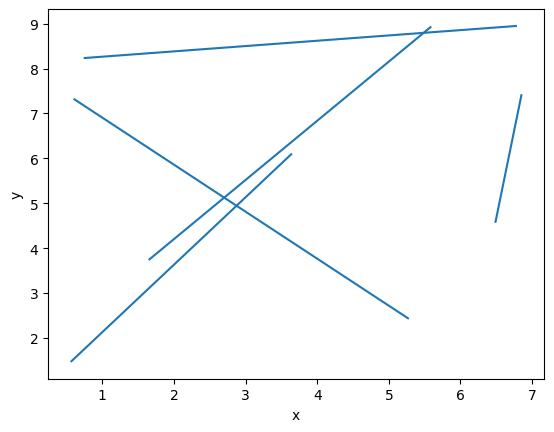

In [156]:
# sect = [((3,7),(6,0)),((0,2),(7,3)),((0,0),(9,9)),((0,5),(8,6))]
vs = sectionVis(sect)
# vs.add_line_segment(((4.8833, 7.089),(9.2698, 5.7486)), color='red')
# vs.add_line_segment(((0.7646, 7.4684),(5.5405, 5.3173)), color='red')
# vs.add_line_segment(((4.5836, 3.9955),(4.6191, 8.1102)), color='green')
# vs.add_point((4.598663880378162, 5.741509819493402))
vs.show()

# _, vis = alg(sect)
# vis.show()

In [157]:
res = alg(sect)
print(res)

((0.5596, 1.4663), 0, 1)
0.5596

1-\ (0.5596, 1.4663)->(3.6477, 6.1065) 


((0.6001, 7.3266), 0, 2)
0.6001

1-\ (0.5596, 1.4663)->(3.6477, 6.1065) 2-\ (0.6001, 7.3266)->(5.2792, 2.4259) 

True 
((0.74, 8.2335), 0, 3)
0.74

1-\ (0.5596, 1.4663)->(3.6477, 6.1065) 2-\ (0.6001, 7.3266)->(5.2792, 2.4259) 3-\ (0.74, 8.2335)->(6.7876, 8.9497) 

True True 
((1.6481, 3.7366), 0, 0)
1.6481

1-\ (0.5596, 1.4663)->(3.6477, 6.1065) 2-\ (0.6001, 7.3266)->(5.2792, 2.4259) 0-\ (1.6481, 3.7366)->(5.5926, 8.9367) 3-\ (0.74, 8.2335)->(6.7876, 8.9497) 

True True True 
((2.7016538338449974, 5.125517553904772), 2, (2, 0))
2.7016538338449974
True

2-\ (0.6001, 7.3266)->(5.2792, 2.4259) 1-\ (0.5596, 1.4663)->(3.6477, 6.1065) 0-\ (1.6481, 3.7366)->(5.5926, 8.9367) 3-\ (0.74, 8.2335)->(6.7876, 8.9497) 

True True True 
((2.874421974133918, 4.944567194837021), 2, (1, 2))
2.874421974133918
False

2-\ (0.6001, 7.3266)->(5.2792, 2.4259) 1-\ (0.5596, 1.4663)->(3.6477, 6.1065) 0-\ (1.6481, 3.7366)->(5.5926, 8.9367) 

ValueError: <__main__.Segment object at 0x000002EEECD24C10> is not in list